In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.cross_validation import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visual exploration

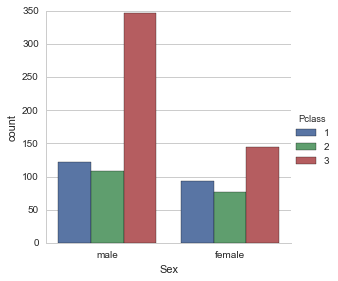

In [5]:
sns.factorplot('Sex', data=titanic_df, hue='Pclass', kind='count')

We can see that they were a lot of males in the thirdclass

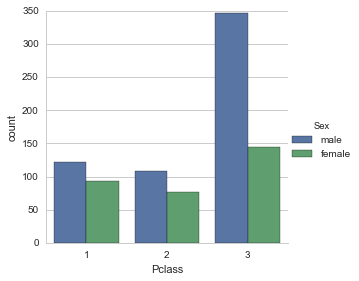

In [6]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count')

When comparing per class we can observe that they were more men in any class 

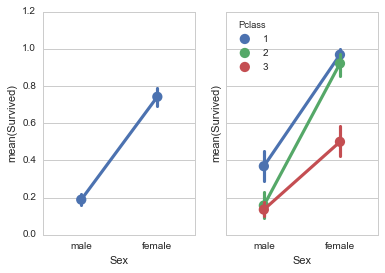

In [7]:
#How did survival rate compare between men and women
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.pointplot(x="Sex", y="Survived", data=titanic_df, ax=ax1);
sns.pointplot(x="Sex", y="Survived", hue='Pclass',data=titanic_df, ax=ax2);

- Comparing to the average survival rate of 0.486592, females have a much higher survival rate
- When comparing classes between sexes, it is interesting to note that 2nd and 1st Class survival rate for women is the same, but for men 2nd class survival rate is closer the same as 3rd Class. 
- What about kids (people below the age 16)? 

In [8]:
titanic_df['person_status']= np.where((titanic_df['Age'] <16), 'Child', 'Adult')

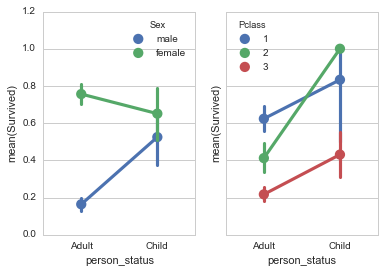

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.pointplot(x="person_status", y="Survived", hue='Sex',data=titanic_df, ax=ax1);
sns.pointplot(x="person_status", y="Survived", hue='Pclass',data=titanic_df, ax=ax2);

- Being a Child improves survival rate for men but interestingly not for women 
- Children are affected by Class as well, but stangely 2nd Class Children have better survival rate than 1st Class, why is that?

### Impact of having siblings or a spouse on board

In [10]:
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

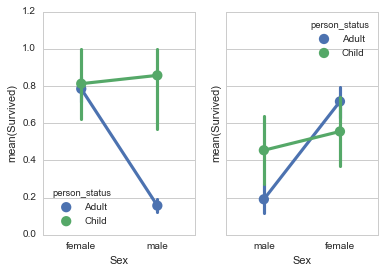

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.pointplot(x="Sex", y="Survived", hue='person_status', data=titanic_df[titanic_df['SibSp']==0], ax=ax1);
sns.pointplot(x="Sex", y="Survived", hue='person_status',data=titanic_df[titanic_df['SibSp']>0], ax=ax2);

Being on your own:
- Very positive for childre
- Positive for women
- Negative for males

Bein with family or spouse:
- Positive for males
- Negative for women
- Very Negative for children (might be because they were more families in 3rd class)

As we can see below larger family size was positive depending on the class. For third class however, the larger the family the lower the probability of survival

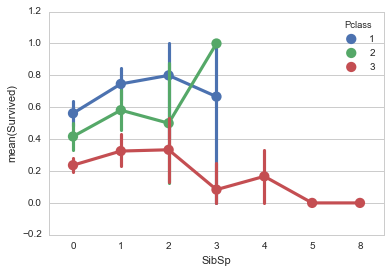

In [12]:
sns.pointplot(x="SibSp", y="Survived", hue="Pclass", data=titanic_df);

In [13]:
#Where people came from 
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#Replace NaN value with S

In [16]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
titanic_df.Embarked.fillna(value='S', inplace=True);